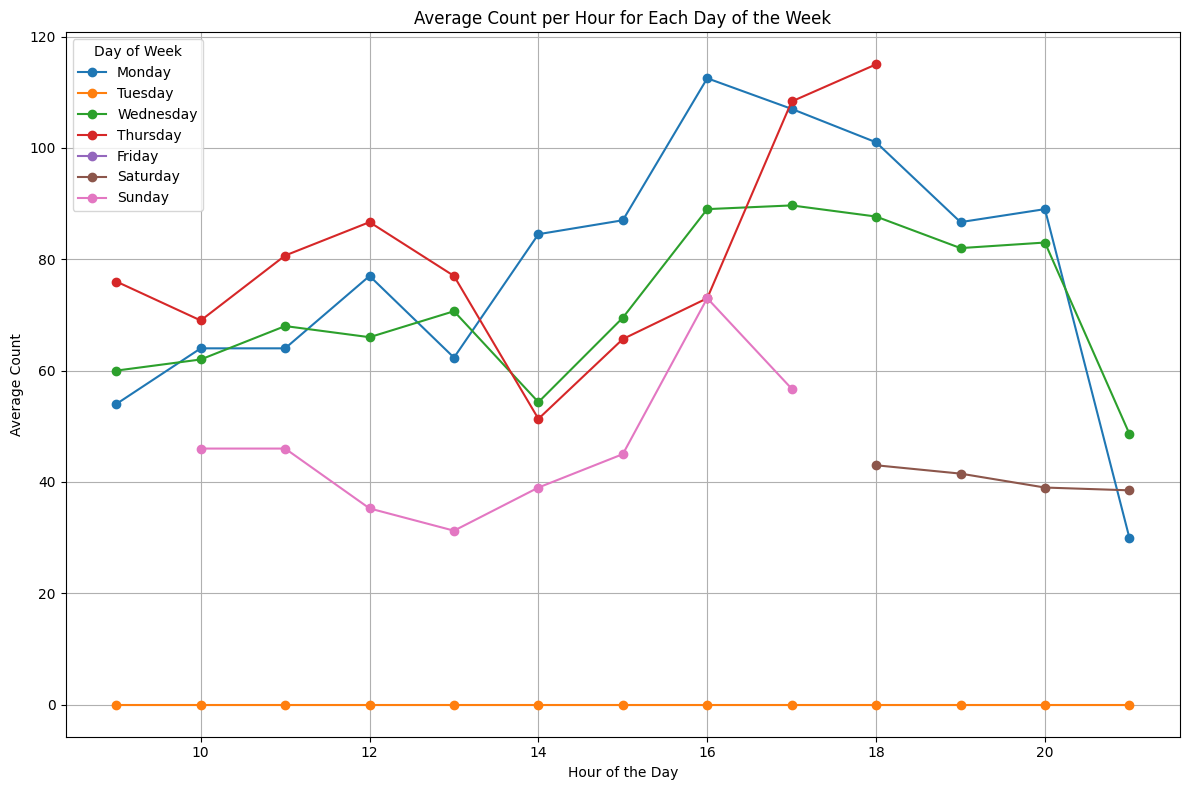

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://github.com/graeyv/NTU_gym/blob/main/scraped_data.csv?raw=true'
data = pd.read_csv(url, header=None)
data.columns = ['timestamp', 'count']

data['timestamp'] = pd.to_datetime(data['timestamp'])
data['timestamp_gmt8'] = data['timestamp'] + pd.DateOffset(hours=8)
data['day_of_week'] = data['timestamp_gmt8'].dt.day_name()
data['hour'] = data['timestamp_gmt8'].dt.hour

# Group by day of the week and hour, and calculate the average count for each
avg_counts = data.groupby(['day_of_week', 'hour'])['count'].mean().reset_index()

# Sort the days of the week for better plotting order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_counts['day_of_week'] = pd.Categorical(avg_counts['day_of_week'], categories=day_order, ordered=True)

# Pivot the data to ensure each hour is properly aligned for each day, fill missing values with NaN
pivot_data = avg_counts.pivot(index='hour', columns='day_of_week', values='count').reindex(columns=day_order)

plt.figure(figsize=(12, 8))

for day in day_order:
    if day in pivot_data.columns: 
        plt.plot(pivot_data.index, pivot_data[day], label=day, marker='o')

# customize
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')
plt.title('Average Count per Hour for Each Day of the Week')
plt.grid(True)
plt.legend(title='Day of Week')
plt.tight_layout()

plt.show()